In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Preprocess the data: One-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# Build the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose = True)

Epoch 1/10
40/40 [==============================] - 3s 60ms/step - loss: 0.5082 - accuracy: 0.7990 - val_loss: 0.3731 - val_accuracy: 0.8764
Epoch 2/10
40/40 [==============================] - 1s 35ms/step - loss: 0.3080 - accuracy: 0.8947 - val_loss: 0.3109 - val_accuracy: 0.8774
Epoch 3/10
40/40 [==============================] - 1s 33ms/step - loss: 0.2339 - accuracy: 0.9178 - val_loss: 0.2884 - val_accuracy: 0.8842
Epoch 4/10
40/40 [==============================] - 1s 28ms/step - loss: 0.1932 - accuracy: 0.9325 - val_loss: 0.2717 - val_accuracy: 0.8922
Epoch 5/10
40/40 [==============================] - 1s 25ms/step - loss: 0.1663 - accuracy: 0.9419 - val_loss: 0.2784 - val_accuracy: 0.8894
Epoch 6/10
40/40 [==============================] - 1s 30ms/step - loss: 0.1444 - accuracy: 0.9511 - val_loss: 0.2909 - val_accuracy: 0.8882
Epoch 7/10
40/40 [==============================] - 1s 33ms/step - loss: 0.1261 - accuracy: 0.9584 - val_loss: 0.3248 - val_accuracy: 0.8810
Epoch 8/10
40

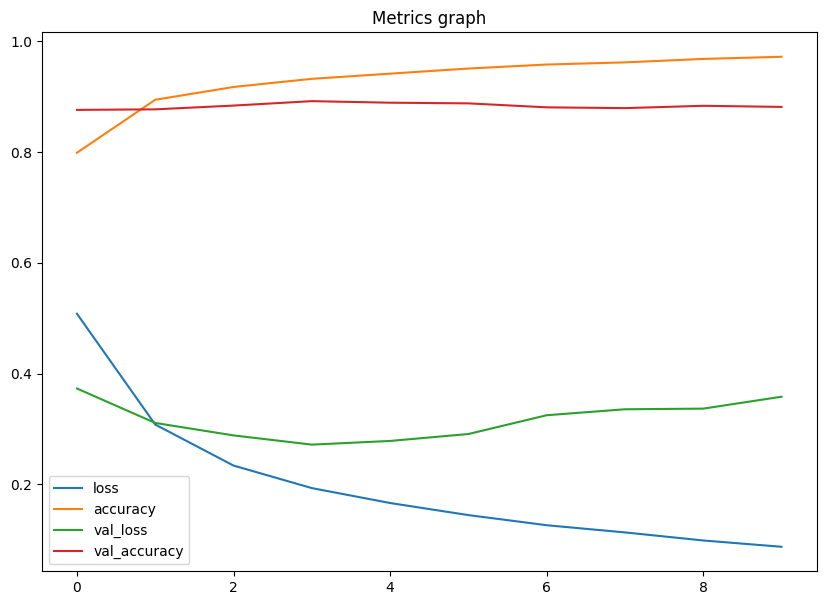

In [8]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)


782/782 [==============================] - 2s 2ms/step - loss: 0.3857 - accuracy: 0.8700


In [10]:
print("Test Accuracy:", (test_accuracy*100))

Test Accuracy: 87.00000047683716


782/782 [==============================] - 2s 2ms/step


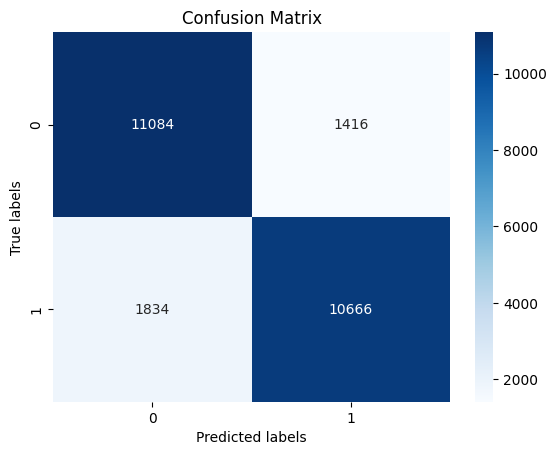


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     12500
         1.0       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [15]:
from sklearn.metrics import confusion_matrix,classification_report
# Predict probabilities for each class
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels using a threshold
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

782/782 [==============================] - 2s 3ms/step


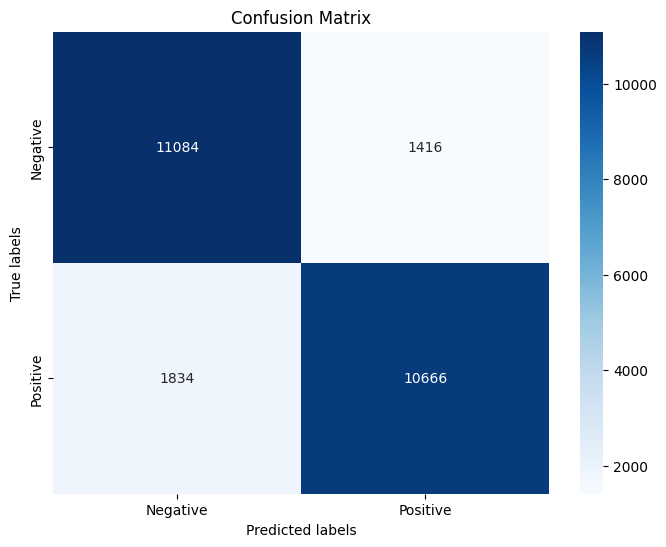


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     12500
    Positive       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [16]:
# Predict probabilities for each class
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels using a threshold
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)